# Problem Statement:
As each coin has two sides, so does technology. On one hand, with the advancement in technology the lives are getting better,
on the other hand, the ill use of technology is also increasing. 
The suspicious activities are increasing ranging from dos attacks, phishing, hacking etc.
In this hackathon, we are concerned with the increasing phishing attacks.


Typically, Phishing is a type of social engineering where an attacker sends a 
fraudulent (e.g., spoofed, fake, or otherwise deceptive)
message designed to trick a person into revealing sensitive information to the 
attacker or to deploy malicious software on the victim's infrastructure like ransomware.

# Task:

The candidates have to read the data and create a model based on the data analysis 
to identify if the website is legitimate or a phishing website. 
The Result will be determined by the two values [1, -1] where 1 represent the legitimate and -1 represents phishing

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
import pandas as pd
import numpy as np

# Importing train text data

In [46]:
tr=pd.read_csv('C:/Users/cmscomputers/Desktop/datasets/Phishing_project/Phising_Training_Dataset.csv')       #train data

In [5]:
ts=pd.read_csv('C:/Users/cmscomputers/Desktop/datasets/Phishing_project/Phising_Testing_Dataset.csv')        #test data

In [6]:
tr.head(2)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1


In [7]:
ts.head(2)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1


In [38]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [39]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          2100 non-null   int64
 1   having_IP                    2100 non-null   int64
 2   URL_Length                   2100 non-null   int64
 3   Shortining_Service           2100 non-null   int64
 4   having_At_Symbol             2100 non-null   int64
 5   double_slash_redirecting     2100 non-null   int64
 6   Prefix_Suffix                2100 non-null   int64
 7   having_Sub_Domain            2100 non-null   int64
 8   SSLfinal_State               2100 non-null   int64
 9   Domain_registeration_length  2100 non-null   int64
 10  Favicon                      2100 non-null   int64
 11  port                         2100 non-null   int64
 12  HTTPS_token                  2100 non-null   int64
 13  Request_URL                  2100 non-null   int

In [40]:
tr.isna().sum()                  #check for missing data

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [41]:
ts.isna().sum()                       #check for missing data

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [42]:
tr.skew().sort_values(ascending=False)                            #check for skewness

Redirect                       2.431036
Prefix_Suffix                  2.170495
URL_Length                     1.647160
SFH                            1.472864
Page_Rank                      1.092704
Domain_registeration_length    0.714702
Links_in_tags                  0.202936
URL_of_Anchor                  0.111162
key                            0.000000
age_of_domain                 -0.057879
having_Sub_Domain             -0.132753
Links_pointing_to_page        -0.195043
Result                        -0.250561
Request_URL                   -0.389370
SSLfinal_State                -0.545484
web_traffic                   -0.585980
having_IP                     -0.645733
DNSRecord                     -0.799352
popUpWidnow                   -1.526678
Favicon                       -1.594115
Submitting_to_email           -1.635846
HTTPS_token                   -1.786460
Abnormal_URL                  -1.973353
having_At_Symbol              -2.013579
Google_Index                  -2.030274


In [43]:
ts.skew().sort_values(ascending=False)                           #check for skewness

Redirect                       2.292662
Prefix_Suffix                  2.158820
URL_Length                     1.591288
SFH                            1.490399
Page_Rank                      1.161407
Domain_registeration_length    0.719015
Links_in_tags                  0.201352
URL_of_Anchor                  0.119816
key                            0.000000
Links_pointing_to_page        -0.040408
having_Sub_Domain             -0.056121
Request_URL                   -0.342282
SSLfinal_State                -0.391239
age_of_domain                 -0.406514
web_traffic                   -0.536833
having_IP                     -0.728183
DNSRecord                     -0.880939
popUpWidnow                   -1.675474
Submitting_to_email           -1.696781
Favicon                       -1.718428
having_At_Symbol              -1.771846
Statistical_report            -1.856178
port                          -1.951367
HTTPS_token                   -2.037152
Abnormal_URL                  -2.065131


# Colinearity check

In [44]:
tr.corr()['Result'].sort_values(ascending=False)

Result                         1.000000
SSLfinal_State                 0.712543
URL_of_Anchor                  0.696394
web_traffic                    0.355581
Prefix_Suffix                  0.344660
having_Sub_Domain              0.296728
Request_URL                    0.254572
Links_in_tags                  0.238802
SFH                            0.217931
age_of_domain                  0.135198
Google_Index                   0.121896
Page_Rank                      0.102920
having_IP                      0.094027
DNSRecord                      0.081927
Statistical_report             0.068015
URL_Length                     0.059331
having_At_Symbol               0.050045
on_mouseover                   0.042180
Links_pointing_to_page         0.035003
port                           0.033971
Submitting_to_email            0.011981
RightClick                     0.004880
key                           -0.000854
popUpWidnow                   -0.002868
Favicon                       -0.003260


In [45]:
#the target feature is having 1 and -1 value ,1 not phishing and -1 for phishing.we will convert it into 1 and 0 

In [47]:
tr['Result']=np.where(tr.Result==-1,0,1)
tr.Result.value_counts()

1    5034
0    3921
Name: Result, dtype: int64

In [49]:
for i in tr.columns:
    print(i ,'=========>', len(tr[i].value_counts()), tr[i].dtype)

key =========> 8955 int64
having_IP =========> 2 int64
URL_Length =========> 3 int64
Shortining_Service =========> 2 int64
having_At_Symbol =========> 2 int64
double_slash_redirecting =========> 2 int64
Prefix_Suffix =========> 2 int64
having_Sub_Domain =========> 3 int64
SSLfinal_State =========> 3 int64
Domain_registeration_length =========> 2 int64
Favicon =========> 2 int64
port =========> 2 int64
HTTPS_token =========> 2 int64
Request_URL =========> 2 int64
URL_of_Anchor =========> 3 int64
Links_in_tags =========> 3 int64
SFH =========> 3 int64
Submitting_to_email =========> 2 int64
Abnormal_URL =========> 2 int64
Redirect =========> 2 int64
on_mouseover =========> 2 int64
RightClick =========> 2 int64
popUpWidnow =========> 2 int64
Iframe =========> 2 int64
age_of_domain =========> 2 int64
DNSRecord =========> 2 int64
web_traffic =========> 3 int64
Page_Rank =========> 2 int64
Google_Index =========> 2 int64
Links_pointing_to_page =========> 3 int64
Statistical_report =========> 

In [50]:
#we can see here mostaly feature are having two or three values only ,so will convert them into categorical data type

In [77]:
tr[tr.columns]=tr[tr.columns].astype(str)
tr.info(),

ts[ts.columns]=ts[ts.columns].astype(str)
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   key                          8955 non-null   object
 1   having_IP                    8955 non-null   object
 2   URL_Length                   8955 non-null   object
 3   Shortining_Service           8955 non-null   object
 4   having_At_Symbol             8955 non-null   object
 5   double_slash_redirecting     8955 non-null   object
 6   Prefix_Suffix                8955 non-null   object
 7   having_Sub_Domain            8955 non-null   object
 8   SSLfinal_State               8955 non-null   object
 9   Domain_registeration_length  8955 non-null   object
 10  Favicon                      8955 non-null   object
 11  port                         8955 non-null   object
 12  HTTPS_token                  8955 non-null   object
 13  Request_URL                  8955

In [52]:
tr1=tr.drop('key',axis=1)    #dropped unwanted column ,it just contains unique values

In [53]:
tr1.head()

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


Visualising the data to get insights

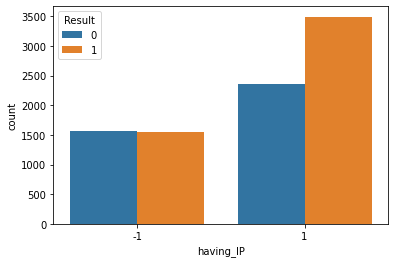

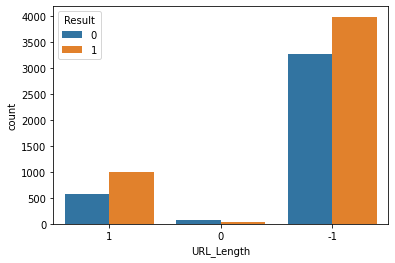

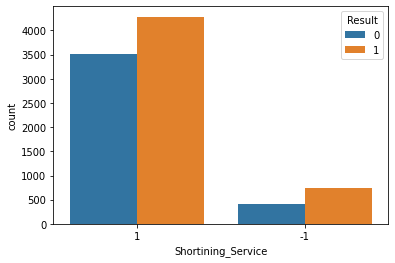

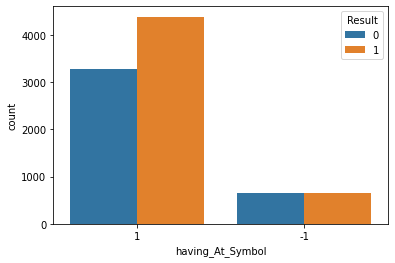

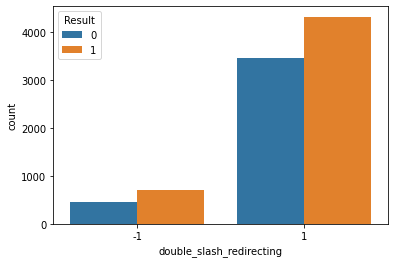

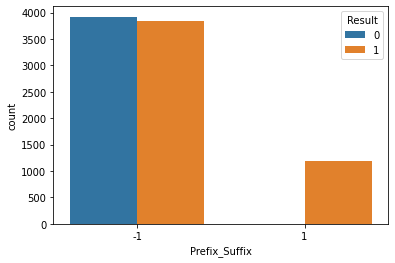

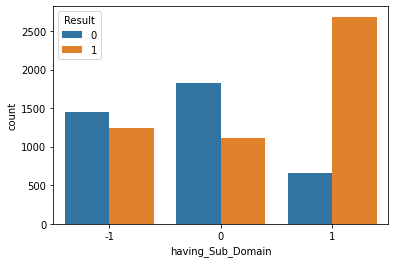

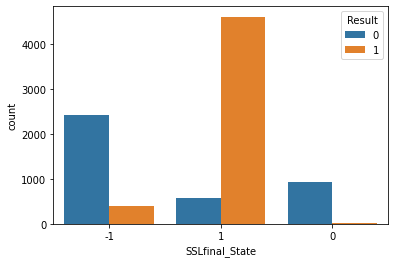

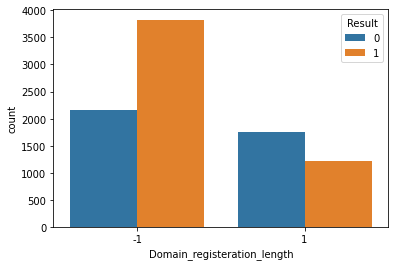

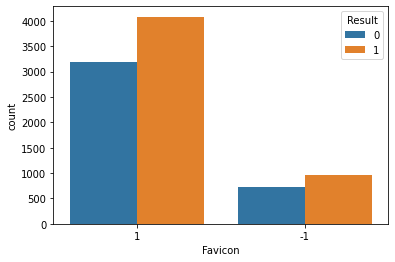

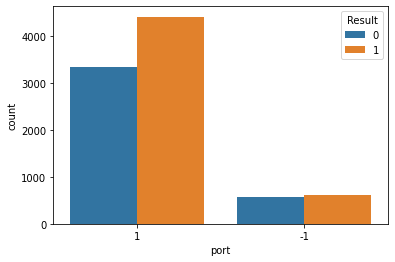

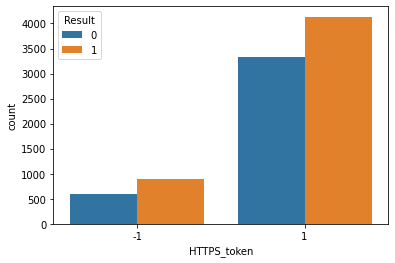

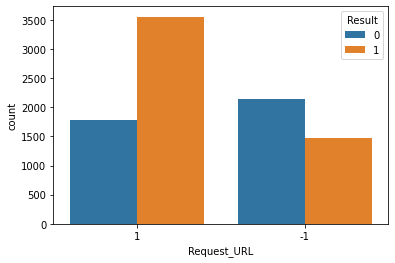

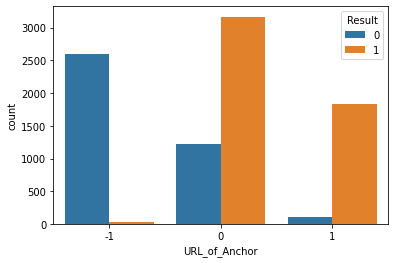

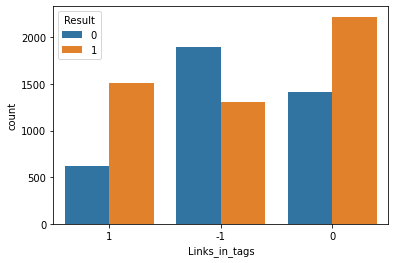

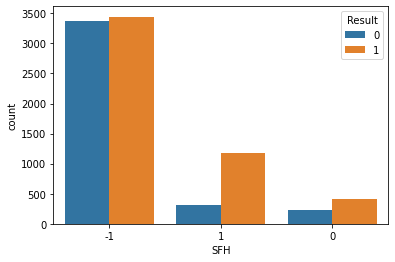

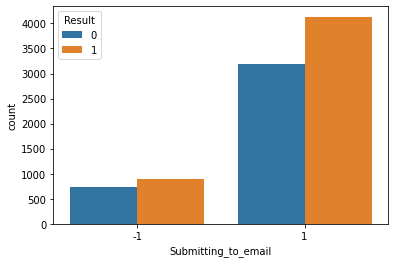

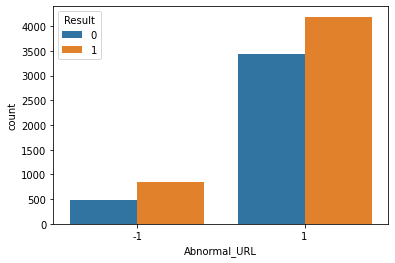

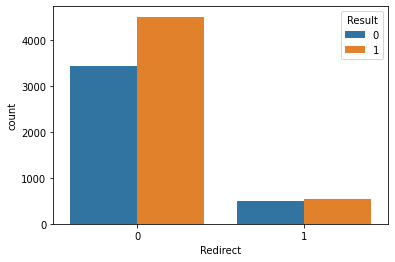

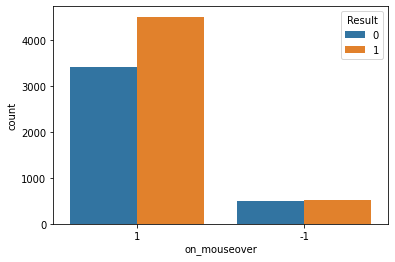

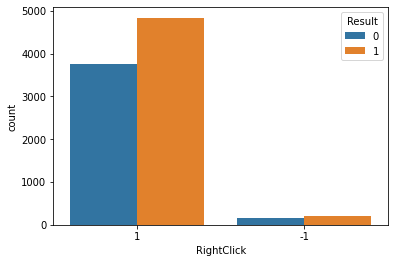

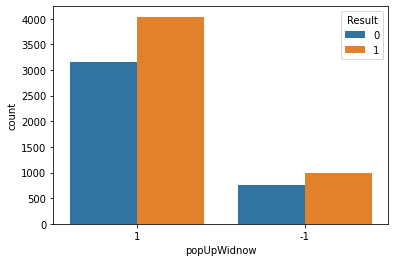

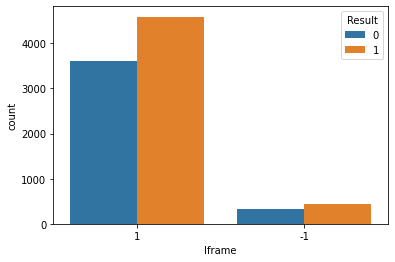

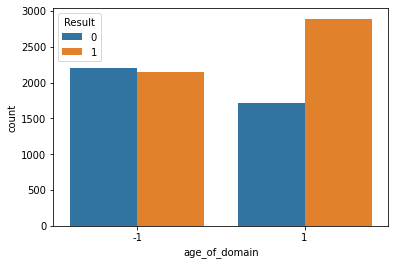

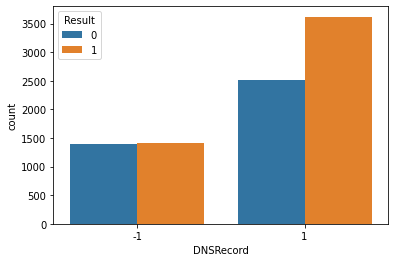

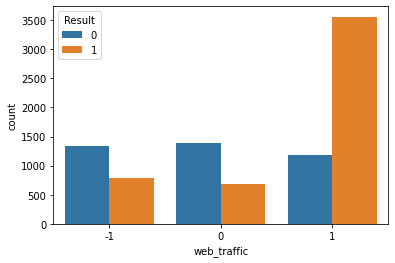

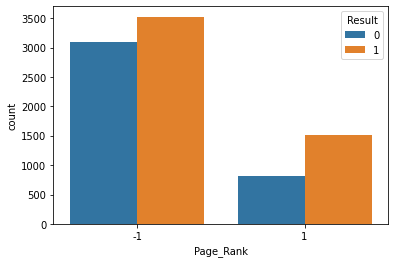

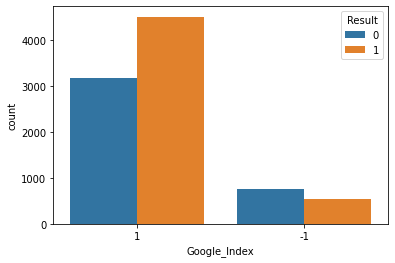

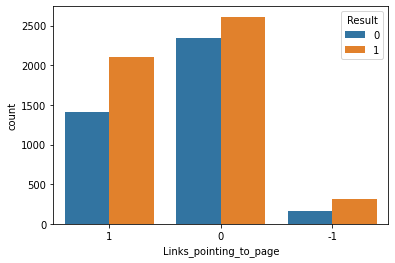

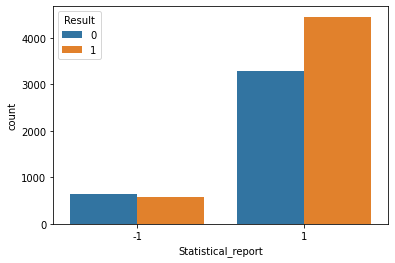

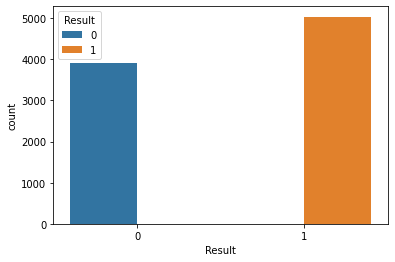

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in tr1:
    sns.countplot(tr1[i],hue=tr['Result'])
    plt.show()
                            

In [55]:
#Declaring target and independant features

In [56]:
X=tr1.drop('Result',axis=1)
Y=tr1[['Result']]

# Data standerdization

In [57]:
X_st=pd.get_dummies(X)

In [59]:
X_st.head()

,having_IP_-1,having_IP_1,URL_Length_-1,URL_Length_0,URL_Length_1,Shortining_Service_-1,Shortining_Service_1,having_At_Symbol_-1,having_At_Symbol_1,double_slash_redirecting_-1,...,web_traffic_1,Page_Rank_-1,Page_Rank_1,Google_Index_-1,Google_Index_1,Links_pointing_to_page_-1,Links_pointing_to_page_0,Links_pointing_to_page_1,Statistical_report_-1,Statistical_report_1
0,1,0,0,0,1,0,1,0,1,1,...,0,1,0,0,1,0,0,1,1,0
1,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
2,0,1,0,1,0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,1,0,...,1,1,0,0,1,1,0,0,0,1
4,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1


Splitting data into training and testing

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_st,Y,test_size=0.2,random_state=21)        #splitting data into train n test for accuracy check

# Model creation and regularization

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [69]:
models= {
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "RandomForestClassifier":RandomForestClassifier(),
          "LogisticRegression":LogisticRegression(),
          "AdaboostClassifier": AdaBoostClassifier(DecisionTreeClassifier()) 
} 
      
for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(xtrain,ytrain)
        
        #make predictions
        ytrain_pred=model.predict(xtrain)
        ytest_pred=model.predict(xtest)
        
        #training set performance
        model_train_accuracy=accuracy_score(ytrain,ytrain_pred)
        model_train_f1=f1_score(ytrain,ytrain_pred,average="weighted")
        
        #testing set performances
        model_test_accuracy=accuracy_score(ytest,ytest_pred)
        model_test_f1=f1_score(ytest,ytest_pred,average="weighted")
        
        print(list(models.keys())[i])
        
        
        print('Model performances for trainig set')
        print('Accuracy :{:.4f}'.format(model_train_accuracy))
        print('F1_score :{:.4f}'.format(model_train_f1))
        
        print('----------------------------------')
        
        print('Model performances for testing set')
        print('Accuracy :{:.4f}'.format(model_test_accuracy))
        print('F1_score :{:.4f}'.format(model_test_f1))
       
        print("="*40)
        print("\n")

DecisionTreeClassifier
Model performances for trainig set
Accuracy :0.9902
F1_score :0.9902
----------------------------------
Model performances for testing set
Accuracy :0.9492
F1_score :0.9492


RandomForestClassifier
Model performances for trainig set
Accuracy :0.9902
F1_score :0.9902
----------------------------------
Model performances for testing set
Accuracy :0.9626
F1_score :0.9626


LogisticRegression
Model performances for trainig set
Accuracy :0.9422
F1_score :0.9421
----------------------------------
Model performances for testing set
Accuracy :0.9352
F1_score :0.9352


AdaboostClassifier
Model performances for trainig set
Accuracy :0.9902
F1_score :0.9902
----------------------------------
Model performances for testing set
Accuracy :0.9609
F1_score :0.9609




In [70]:
#Hyper Parameter training
params1 = {"max_depth": [2,4,8,12,16,20,25,30,40,50,60,70]}

params2 = {'n_estimators':[50,100,150,200,500],
        'learning_rate':[0.3,0.5,0.7,0.9,1.0],
         'random_state':[21,31]} 

In [72]:
#models list for hyper parameter tuning
randomcv_models = [('DecisionTree',DecisionTreeClassifier(),params1),
                   ('Random_forest',RandomForestClassifier(),params1),
                   ('AdaBoostClassifier',AdaBoostClassifier(DecisionTreeClassifier()),params2)
]


In [73]:
#Finding best parameters 
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=100,
                               cv=4,
                               verbose=2,
                               n_jobs=-1)
    
    random.fit(xtrain,ytrain)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------------------Best Params for =={model_name}-----------------------")
    print(model_param[model_name])

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
---------------------Best Params for ==DecisionTree-----------------------
{'max_depth': 50}
---------------------Best Params for ==Random_forest-----------------------
{'max_depth': 16}
---------------------Best Params for ==AdaBoostClassifier-----------------------
{'random_state': 31, 'n_estimators': 100, 'learning_rate': 0.9}


In [76]:
models= { 'DecisionTree':DecisionTreeClassifier(max_depth=50),
          "RandomForestClassifier":RandomForestClassifier(max_depth=20,random_state=16),
          'AdaBoostClassifier':AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),random_state=31,n_estimators=100,learning_rate=0.9)
} 
      
for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(xtrain,ytrain)
        
        #make predictions
        ytrain_pred=model.predict(xtrain)
        ytest_pred=model.predict(xtest)
        
        #training set performance
        model_train_accuracy=accuracy_score(ytrain,ytrain_pred)
        model_train_f1=f1_score(ytrain,ytrain_pred,average="weighted")
        
        #testing set performances
        model_test_accuracy=accuracy_score(ytest,ytest_pred)
        model_test_f1=f1_score(ytest,ytest_pred,average="weighted")
       
        
        print(list(models.keys())[i])
        
        
        print('Model performances for trainig set')
        print('Accuracy :{:.4f}'.format(model_train_accuracy))
        print('F1_score :{:.4f}'.format(model_train_f1))
       
        print('----------------------------------')
        
        print('Model performances for testing set')
        print('Accuracy :{:.4f}'.format(model_test_accuracy))
        print('F1_score :{:.4f}'.format(model_test_f1))
        
        print("="*40)
        print("\n")

DecisionTree
Model performances for trainig set
Accuracy :0.9902
F1_score :0.9902
----------------------------------
Model performances for testing set
Accuracy :0.9503
F1_score :0.9503


RandomForestClassifier
Model performances for trainig set
Accuracy :0.9902
F1_score :0.9902
----------------------------------
Model performances for testing set
Accuracy :0.9654
F1_score :0.9654


AdaBoostClassifier
Model performances for trainig set
Accuracy :0.9654
F1_score :0.9654
----------------------------------
Model performances for testing set
Accuracy :0.9581
F1_score :0.9581




# test data for result prediction

In [78]:
ts.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [79]:
ts1=ts.drop('key',axis=1)

In [82]:
ts1=pd.get_dummies(ts1)

# Getting prediction on trained created model

In [80]:
# we are getting good results with random forest classifier with max_depth=16
rf=RandomForestClassifier(n_estimators=100,max_depth=16)
model=rf.fit(xtrain,ytrain)

In [83]:
prediction=pd.DataFrame(model.predict(ts1))

In [84]:
prediction

,0
0,1
1,0
2,0
3,0
4,1
...,...
2095,1
2096,1
2097,0
2098,1


In [85]:
ts['Result']=prediction

In [86]:
ts

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,-1,0,1,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,-1,-1,0,-1,-1,0,1,0
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,1,-1,1,-1,1,1,-1,0
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,-1,-1,1,-1,1,-1,1,1,-1,0
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,-1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,23433,-1,-1,-1,1,-1,-1,1,1,1,...,1,1,1,-1,1,-1,-1,1,1,1
2096,23434,1,1,1,-1,1,-1,1,1,-1,...,-1,1,-1,1,-1,1,1,1,1,1
2097,23435,1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,0,-1,1,0,1,0
2098,23436,1,-1,1,-1,1,-1,0,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
